In [1]:
from bigraph_viz import plot_bigraph

plot_settings = {}

In [2]:
# !pip install bigraph-viz --upgrade
!pip freeze | grep bigraph-viz

-e git+https://github.com/vivarium-collective/bigraph-viz.git@d90674ab4efa2be58d4cdae2c48bc4631bdb0038#egg=bigraph_viz


In [3]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.visualize_types:

plot_bigraph(state, schema=None, core=None, out_dir=None, filename=None, **kwargs)



# example 

This example uses a composite specification that has nesting, multiple processes, types and values included.

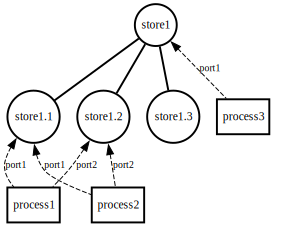

In [4]:
nested_composite_spec = {
    'store1': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'integer',
        },
        'store1.3': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'process1': {
            '_type': 'process',
            '_outputs': {
                'port1': 'float', 
                'port2': 'integer',
            },
            'outputs': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            '_type': 'process',
            '_outputs': {
                'port1': 'float', 
                'port2': 'integer',
            },
            'outputs': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        '_type': 'process',
        'outputs': {
            'port1': 'store1',
        }
    }
}
plot_bigraph(nested_composite_spec)

Processes are by default shown with place edges to their outer nodes (see process1 and process2 above). To remove this use `remove_process_place_edges=True`:

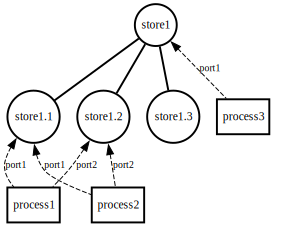

In [5]:
# plot_settings['remove_process_place_edges'] = True
plot_bigraph(nested_composite_spec, **plot_settings)

To remove specific nodes from the vizualization, pass in a list of paths to those nodes. In this example the node in path `('store1', 'store1.3')` is removed:

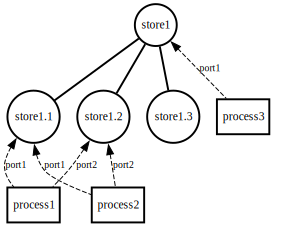

In [6]:
remove_nodes = [
    ('store1', 'store1.3'),
]
plot_settings['remove_nodes'] = remove_nodes
plot_bigraph(nested_composite_spec, **plot_settings)

Remove port labels:

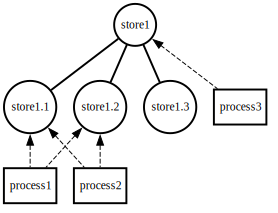

In [7]:
plot_settings['port_labels'] = False
plot_bigraph(nested_composite_spec, **plot_settings)

Change node borders or fill colors

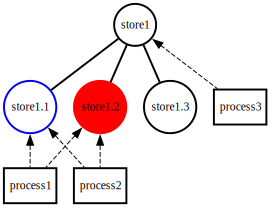

In [8]:
plot_settings['node_border_colors'] = {
    ('store1', 'store1.1'): 'blue',
}
plot_settings['node_fill_colors'] = {
    ('store1', 'store1.2'): 'red',
}
plot_bigraph(nested_composite_spec, **plot_settings)

To group nodes use `node_groups`, A list of lists of grouped node paths, which will be visually placed at the same rank.

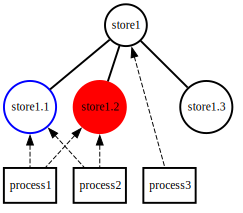

In [9]:
plot_settings['node_groups'] = [
    [('store1', 'process1'), ('store1', 'process2'), ('process3',)]
]
plot_bigraph(nested_composite_spec, **plot_settings)

Change the orientation with `rankdir` using the graphviz orientation key. `'TB'`=top-to-bottom, `'LR'`=left-to-right. By default this is top-to-bottom.

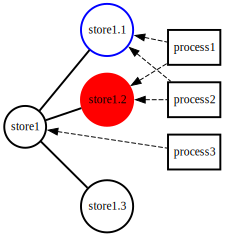

In [10]:
plot_settings['rankdir'] = 'LR'
plot_bigraph(nested_composite_spec, **plot_settings)